### 필수과제 1
- 하이퍼파라미터에 대한 사전적 정의를 정리하기 (항상 했던 방식대로)
- iris 데이터를 가지고 위의 하이퍼파라미터를 변경해 보면서 값이 어떤 식으로 변하는지 확인해 주세요.
- 정확도(f1스코어 등 다양하게 가능) 등 지표를 확인해서 어떤 식으로 바뀌는지 체크하기
- gridsearchCV 등까지 해서 최적의 파라미터와 평가지표 값이 어떤 식으로 나오는지 체크해 주세요.
- 본인이 판단하기에 어디까지가 과적합이 아닌 것인가? 정리해 주세요.

### DecisionTreeClassifier 하이퍼파라미터
- ccp_alpha : non-negative float, default=0.0, Minimal Cost-Complexity Pruning의 복잡도 파라미터값을 지정
- class_weight : dict, list of dict or "balanced", default=None, 클래스의 가중치를 딕셔너리 형태로 지정, balanced는 다음과 같은 공식으로 가중치를 부여함; n_samples / (n_classes * np.bincount(y))
- criterion : {"gini", "entropy", "log_loss"}, default="gini", 분할의 기준이 되는 함수를 지정.
- max_depth : int, default=None, 트리의 최대 깊이(depth)을 설정.
- max_features : int, float or {"auto", "sqrt", "log2"}, default=None, 분할하기 위해 사용하는 피처의 최대 개수를 지정.
- max_leaf_nodes : int, default=None, 리프 노드(leaf node)의 최대 개수를 지정.
- min_impurity_decrease : float, default=0.0, 불순도가 이 수치보다 크거나 같을 경우 분할을 함. 가중치가 지정될 경우 다음 공식을 따른다; N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)
- min_samples_leaf : int or float, default=1, 리프 노드(leaf node)가 되기 위해 필요한 샘플 수의 최솟값을 설정.
- min_samples_split : int or float, default=2, 분할을 하기 위해 필요한 샘플 수의 최솟값을 설정.
- min_weight_fraction_leaf : float, default=0.0, 리프 노드(leaf node)가 되기 위해 필요한 가중치 합의 최솟값을 설정.
- random_state : int, RandomState instance or None, default=None, 시드값 지정.
- splitter : {"best", "random"}, default="best", 분할 방식을 설정, best는 가장 좋은 분할을, random은 무작위로 나눈 것들 중 가장 좋은 분할을 선택함.

### iris 데이터셋으로 결정트리 생성

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz

In [3]:
iris_data = load_iris()

In [20]:
# 기본값 파라미터
dt_clf = DecisionTreeClassifier(random_state=123)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=123)
dt_clf = dt_clf.fit(X_train, y_train)

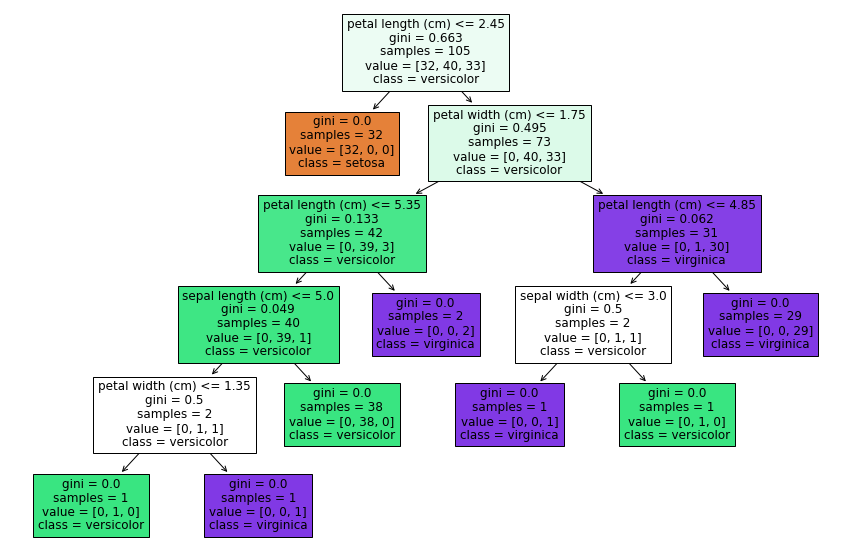

In [21]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

cl_list = list(iris_data.target_names)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=iris_data.feature_names, 
                   class_names=cl_list, filled=True)

In [22]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}
정확도 : 0.9555555555555556


In [23]:
# criterion = "entropy"
dt_clf = DecisionTreeClassifier(criterion="entropy", random_state=123)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=123)
dt_clf = dt_clf.fit(X_train, y_train)

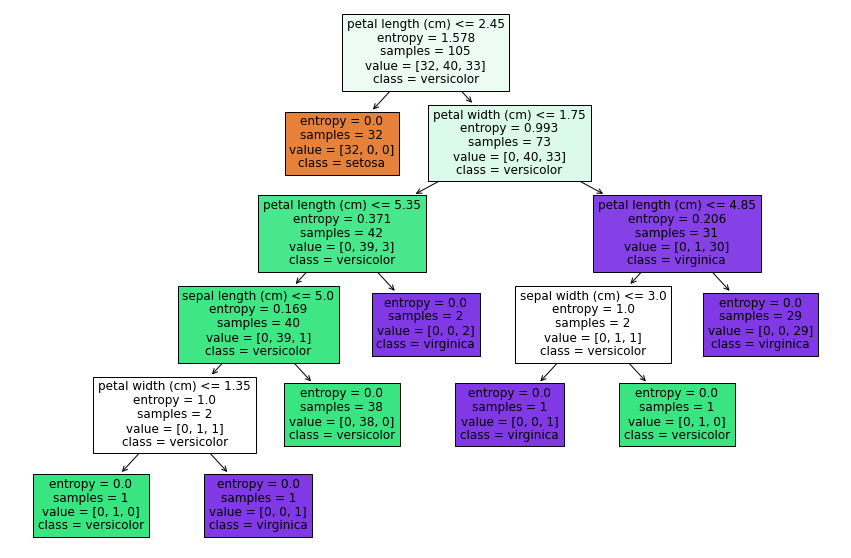

In [24]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

cl_list = list(iris_data.target_names)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=iris_data.feature_names, 
                   class_names=cl_list, filled=True)

In [25]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}
정확도 : 0.9555555555555556


In [26]:
# max_depth = 3
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=123)
dt_clf = dt_clf.fit(X_train, y_train)

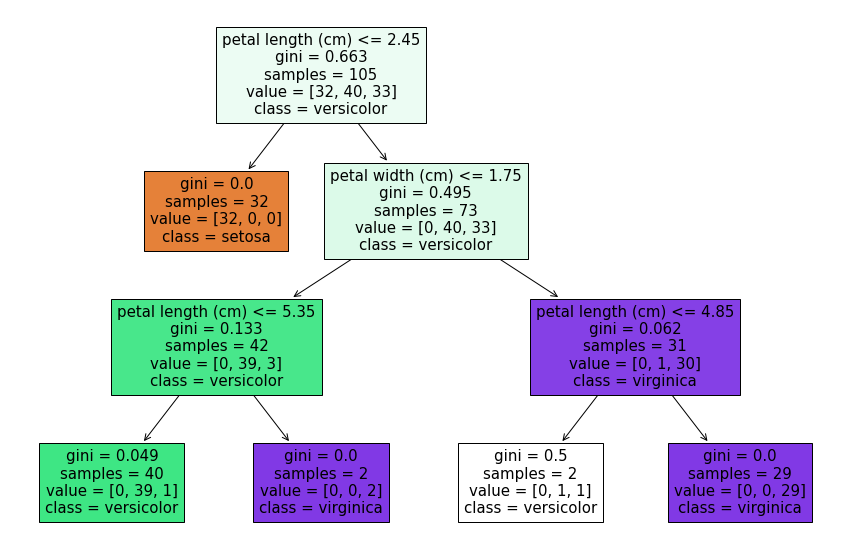

In [27]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

cl_list = list(iris_data.target_names)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=iris_data.feature_names, 
                   class_names=cl_list, filled=True)

In [28]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}
정확도 : 0.9333333333333333


In [29]:
# min_samples_split = 5
dt_clf = DecisionTreeClassifier(min_samples_split=5, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=123)
dt_clf = dt_clf.fit(X_train, y_train)

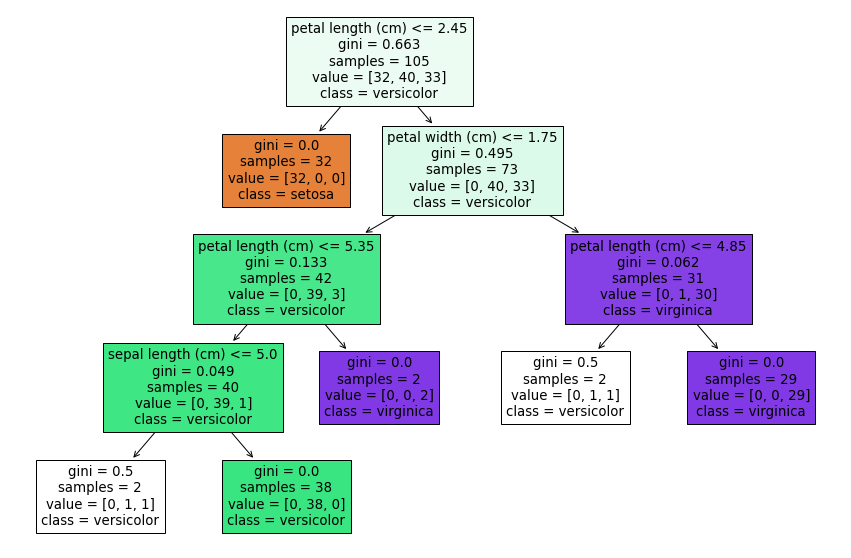

In [30]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

cl_list = list(iris_data.target_names)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=iris_data.feature_names, 
                   class_names=cl_list, filled=True)

In [31]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}
정확도 : 0.9333333333333333


In [32]:
# splitter = "random"
dt_clf = DecisionTreeClassifier(splitter="random", random_state=123)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=123)
dt_clf = dt_clf.fit(X_train, y_train)

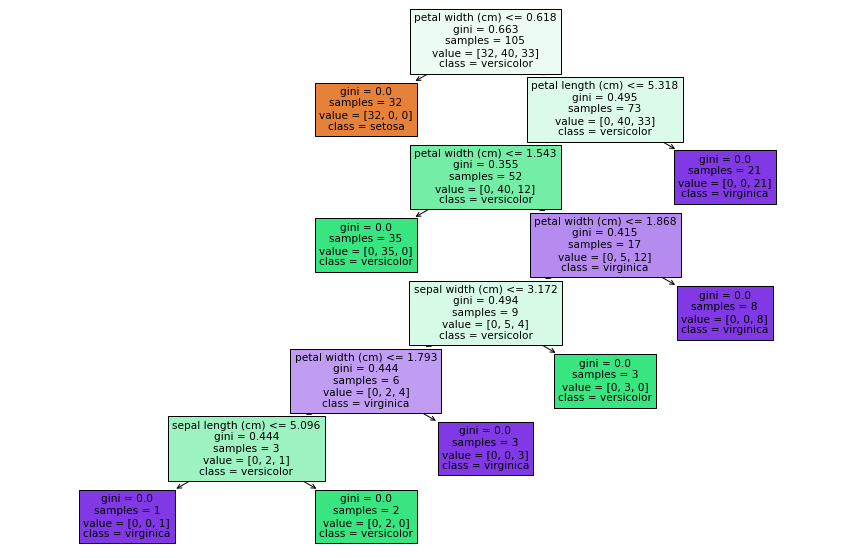

In [33]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

cl_list = list(iris_data.target_names)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=iris_data.feature_names, 
                   class_names=cl_list, filled=True)

In [34]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'random'}
정확도 : 0.9555555555555556


In [35]:
# max_features = 1
dt_clf = DecisionTreeClassifier(max_features=1, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=123)
dt_clf = dt_clf.fit(X_train, y_train)

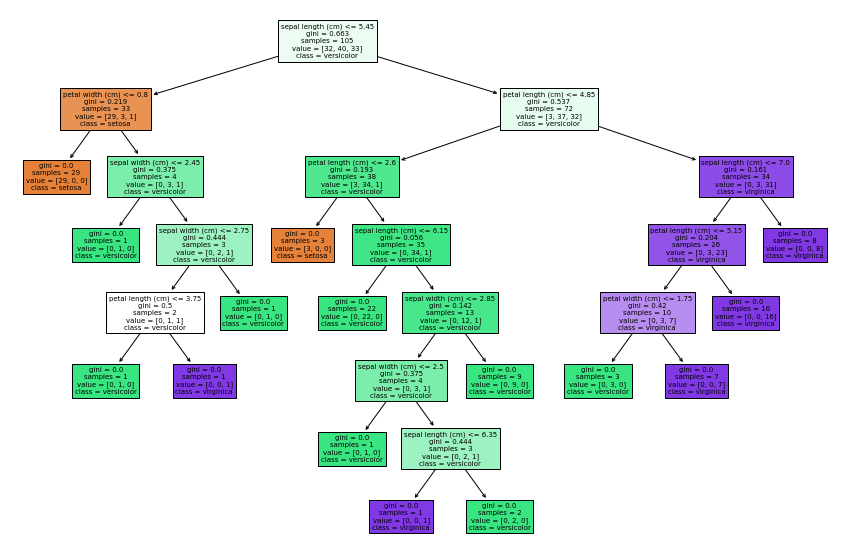

In [36]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

cl_list = list(iris_data.target_names)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=iris_data.feature_names, 
                   class_names=cl_list, filled=True)

In [37]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}
정확도 : 0.9111111111111111


- 하이퍼파라미터는 트리의 과적합을 막기 위해 사용할 수 있다.
- iris 데이터의 경우 데이터 수가 적어서 과적합 여부를 파악하기 어렵다.